In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from transitfit import LightCurve, KeplerLightCurve, TransitModel

In [2]:
lc = KeplerLightCurve(1422, [1,2])
lc.save_hdf('test_lc.h5')
lc = LightCurve.load_hdf('test_lc.h5')

In [3]:
model = TransitModel(lc)

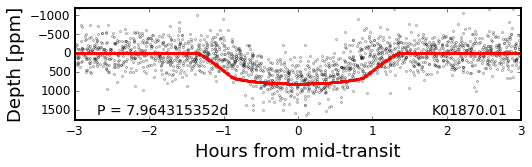

In [4]:
params = lc.default_params  #super-simple guesses for parameters
fig = model.plot_planets(params); #not bad!

In [5]:
model.lnpost(params)

5.6603363740111678

In [6]:
%timeit f = model(params) #evaluates ln(posterior)

10 loops, best of 3: 74.4 ms per loop


In [7]:
#fit = model.fit_leastsq(params, options={'disp':True})
#fig = model.plot_planets(lc.default_params, color='b'); 
#fig = model.plot_planets(model._bestfit, color='r', fig=fig);

Now, let's do a test `emcee` run (this many iterations takes about 3 minutes):

In [6]:
import time
start = time.time()
model.fit_emcee(nburn=500, niter=1000); 
stop = time.time()
print 'emcee fit took {:.1f} minutes.'.format((stop-start)/60)

emcee fit took 22.1 minutes.


In [7]:
model.save_hdf('K01870.01.h5')

In [9]:
model.save_hdf('test_model.h5')

In [10]:
model = TransitModel.load_hdf('test_model.h5')

In [11]:
model.samples.head()

,dilution,flux_zp,q1,q2,rho,period_1,epoch_1,b_1,rprs_1,ecc_1,omega_1,period_2,epoch_2,b_2,rprs_2,ecc_2,omega_2
0,0.066485,0.999970,0.487172,0.460964,4.173160,5.841694,135.922530,0.391313,0.037694,0.028174,4.826371,19.850268,133.650436,0.444249,0.038722,0.022583,4.246579
1,0.066485,0.999970,0.487172,0.460964,4.173160,5.841694,135.922530,0.391313,0.037694,0.028174,4.826371,19.850268,133.650436,0.444249,0.038722,0.022583,4.246579
2,0.068837,0.999969,0.495473,0.459917,4.169193,5.841691,135.922526,0.383592,0.037730,0.029681,4.868027,19.850270,133.650448,0.427951,0.038732,0.024850,4.167208
3,0.075099,1.000005,0.552630,0.497388,3.944421,5.841639,135.922778,0.443566,0.037987,0.045240,5.602568,19.850295,133.650077,0.594797,0.038696,0.027705,4.317960
4,0.075099,1.000005,0.552630,0.497388,3.944421,5.841639,135.922778,0.443566,0.037987,0.045240,5.602568,19.850295,133.650077,0.594797,0.038696,0.027705,4.317960


In [8]:
model.samples.describe()

,flux_zp,rho,q1,q2,dilution,period_1,epoch_1,b_1,rprs_1,ecc_1,omega_1
count,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,2.000000e+05,2.000000e+05,200000.000000,200000.000000
mean,370.522767,1.896180e+10,0.508879,0.491440,0.517230,1328.803452,-1.531370e+07,2.165436e+05,1.392301e+06,0.390558,3.193904
std,2608.826761,6.444460e+10,0.234524,0.223465,0.223758,4374.435346,5.058726e+07,7.249435e+05,4.837855e+06,0.208836,1.812193
min,-32260.395219,3.412615e+03,0.000307,0.000004,0.000046,0.766663,-1.019267e+09,2.390934e-03,1.902282e-01,0.000077,0.000031
25%,-408.510754,1.119064e+06,0.343910,0.338033,0.368976,7.823044,-1.377210e+06,4.965962e+01,1.748925e+02,0.234766,1.629082
50%,-171.967737,1.023768e+08,0.514840,0.488671,0.523789,11.543574,-5.060212e+04,3.112236e+03,9.058072e+03,0.376450,3.248613
75%,488.077145,1.671358e+09,0.675284,0.644041,0.670320,122.853830,6.949426e+02,3.088433e+04,8.929561e+04,0.529250,4.765152
max,53991.636035,1.288049e+12,0.999994,0.999984,0.999771,88807.432947,7.018261e+04,1.662996e+07,1.021816e+08,0.998498,6.283114


ValueError: Contour levels must be increasing

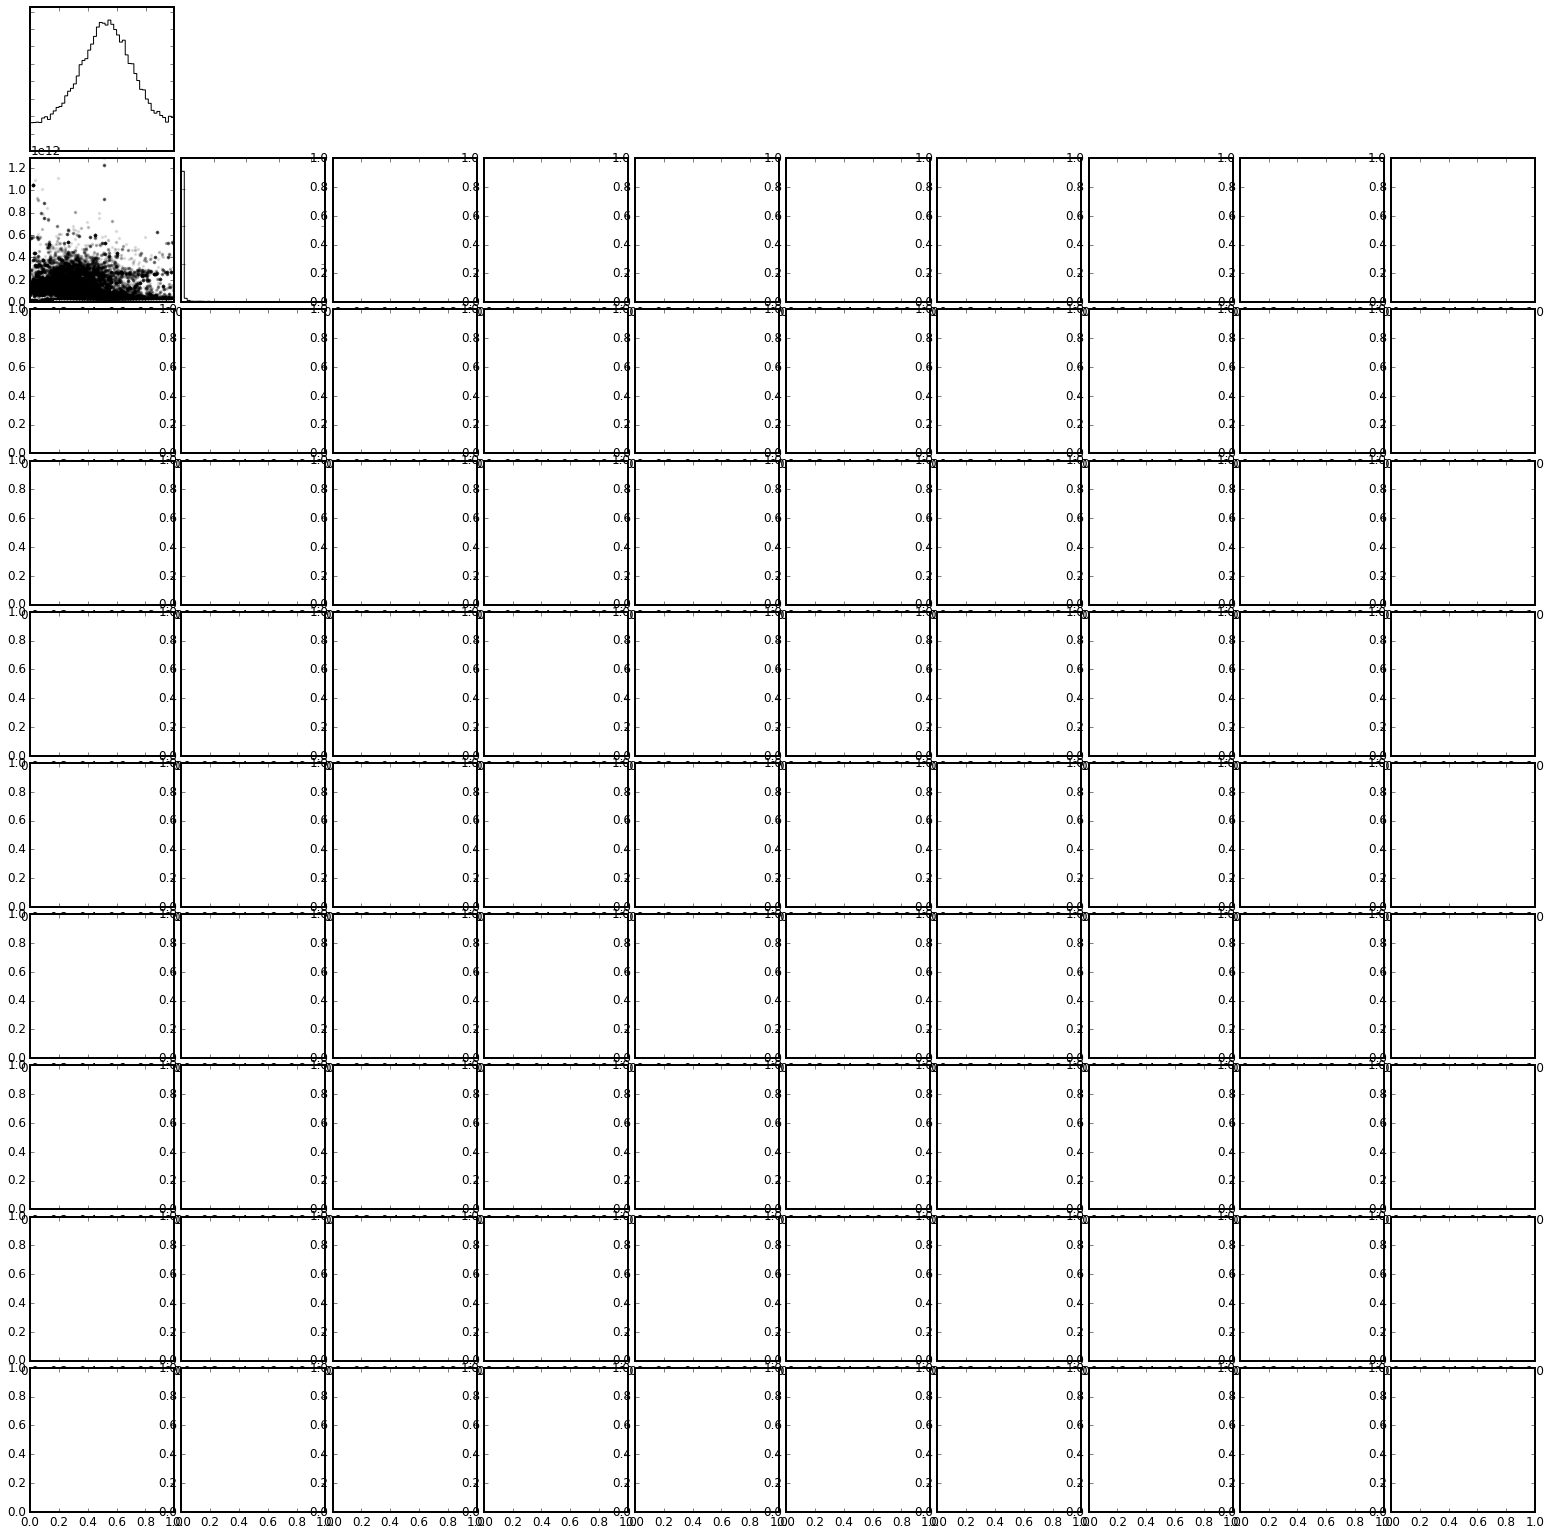

In [9]:
fig1 = model.triangle(i=0); # for first planet

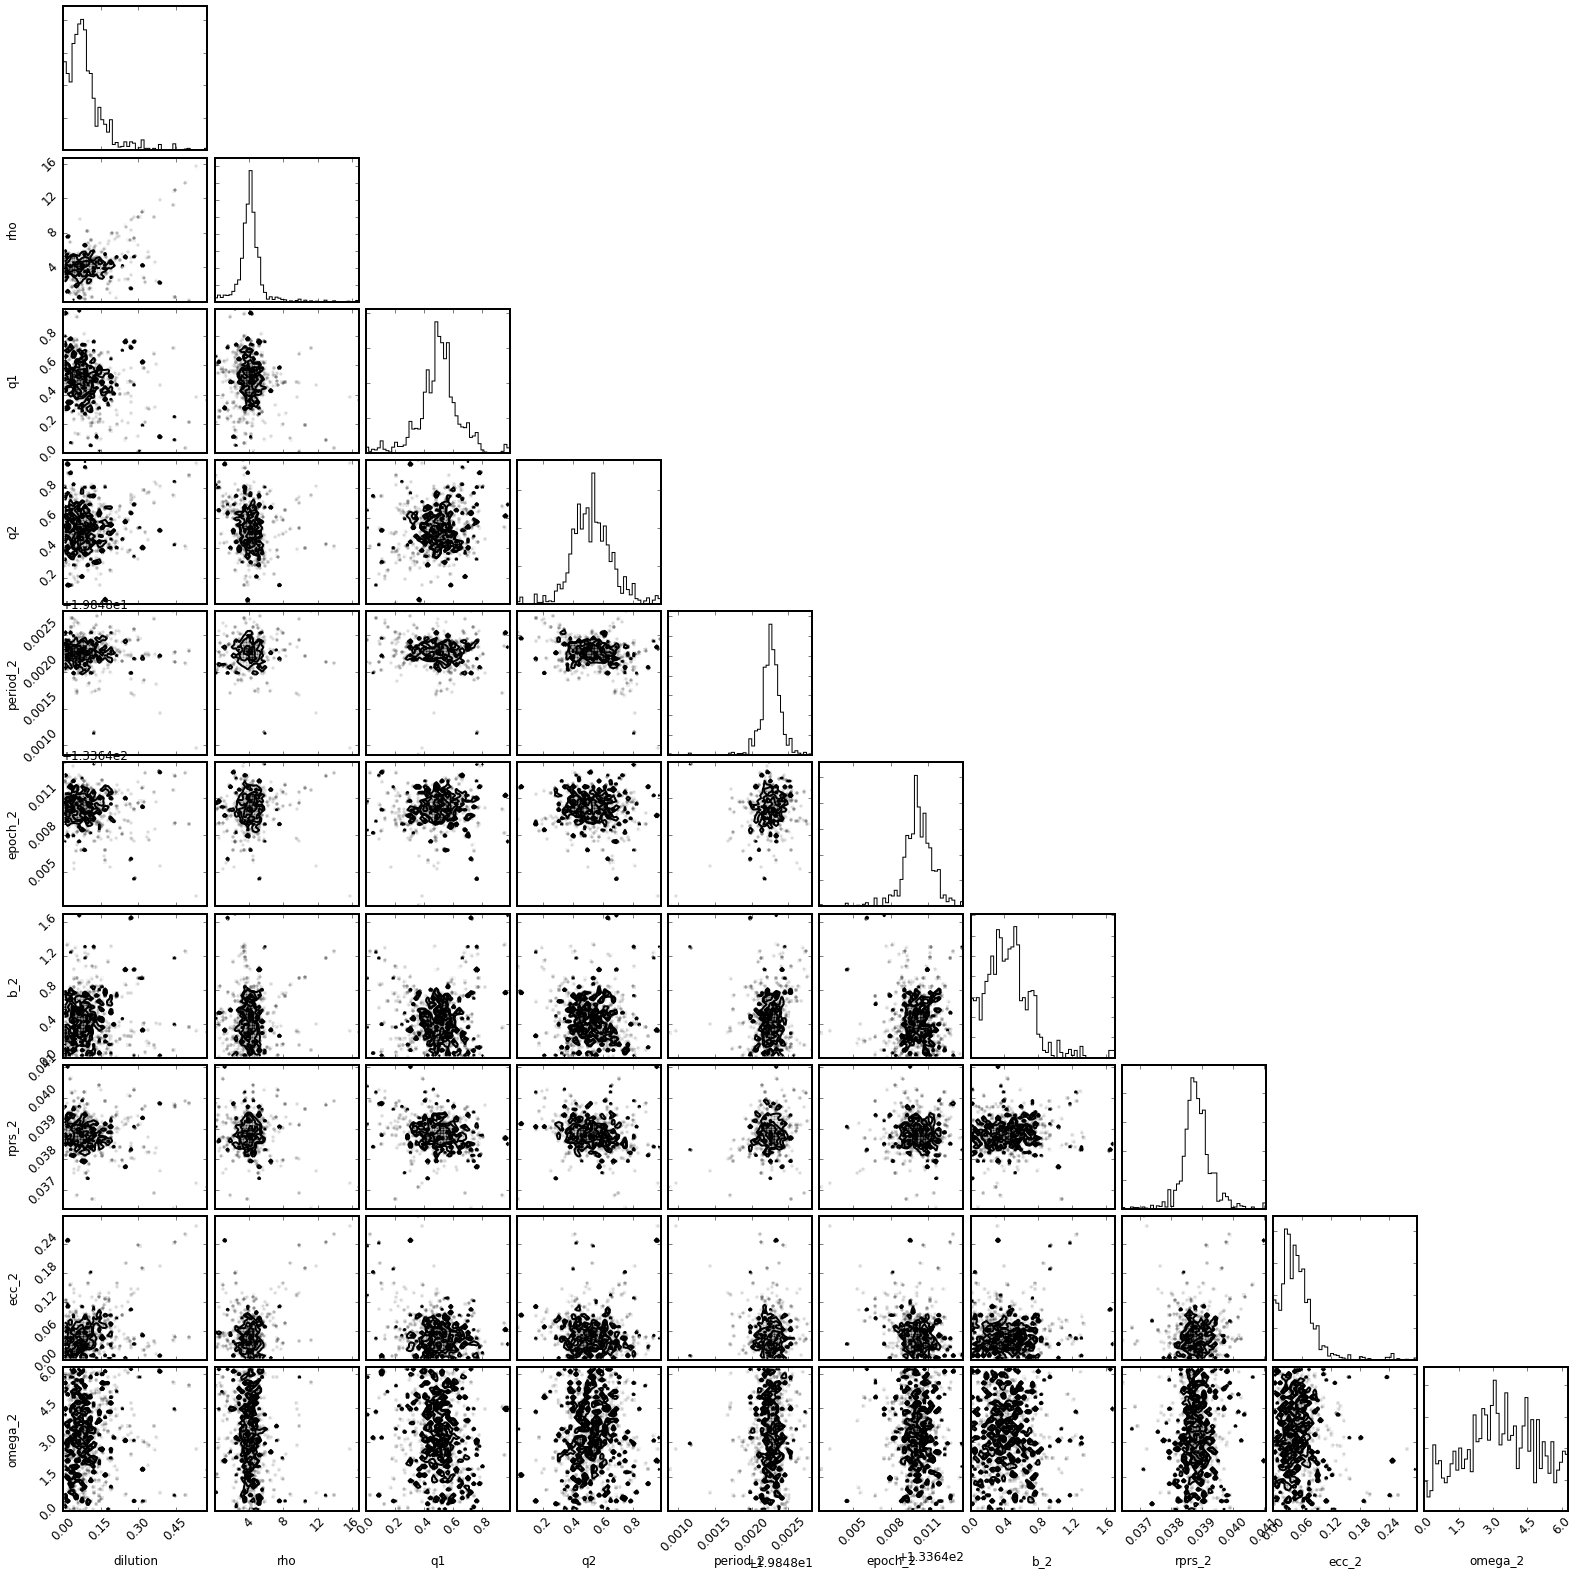

In [14]:
fig2 = model.triangle(i=1)